# Dynamical Decoupling (DD) Simulation
## Specific case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [1]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [2]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [3]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845830152


### Graph t vs $\epsilon$

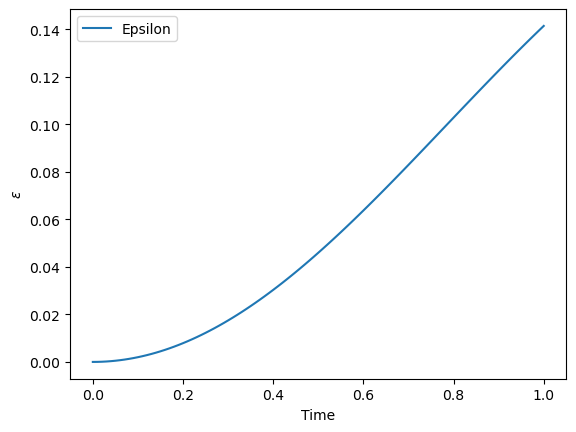

In [4]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previous case is the following:\
Ideal system: **$e^{-iZs_1T}e^{-iZs_2T}e^{-iZs_3T}...e^{-iZs_mT}$** \
Noisy system: **$e^{-i(Z+\lambda{X})s_1T}e^{-i(Z+\lambda{X})s_2T}e^{-i(Z+\lambda{X})s_3T}...e^{-i(Z+\lambda{X})s_mT}$**
##### Error function:
**$\epsilon=||(e^{-i(Z+\lambda{X})s_1T}Ze^{-i(Z+\lambda{X})s_2T}Ze^{-i(Z+\lambda{X})s_3T}Ze^{-i(Z+\lambda{X})s_4T}Z...Ze^{-i(Z+\lambda{X})s_mT}Z) - e^{-iZT}||$**
### Simulation


In [5]:
def error_calculation(lambda_value, m, T, areEqual, s_values):
    prev_A = I
    
    # Case 1: Periodic DD when s1 = s2 = ... = sm 
    if (areEqual == True):
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0): 
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            # updating the matrix A
            prev_A = A
    
    # Case 2: Concatenated DD or Uhrig DD when s has a different values       
    else:
        i = 1
        # simulating the equation 
        for s in s_values:
            # even numbers
            if (i%2 == 0):
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z-lambda_value*X)*s*T)   
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z+lambda_value*X)*s*T)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1 
            
    B = expm(-1j*Z*T) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

def UDD_calculate_s_values(m):
    s_values = []
    prev_t = 0
    for j in range(1, m+1):
        t = np.power(np.sin(j*np.pi/(2*m)), 2)
        s_values.append(t-prev_t)
        prev_t = t
    return s_values        


In [6]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,10]
error_c1 = []
error_c2 = []
error_c3 = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 (PDD) ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))


print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))

error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[4]))


Case 1 (PDD) ##########################
For m = 2 the error is 0.0004995820845830152
For m = 4 the error is 0.000249635378216025
For m = 6 the error is 0.00016640438462290198
For m = 8 the error is 0.00012479824917967564
For m = 10 the error is 9.983673349921259e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0004995820845830152
For m = 3 the error is 1.2499098133246424e-05
For m = 6 the error is 1.8775597711948834e-07
For m = 11 the error is 2.6064627389811953e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.0004995820845830133
For m = 3 the error is 1.249909813324385e-05
For m = 4 the error is 2.903186326102563e-07
For m = 6 the error is 8.175186759985752e-08
For m = 10 the error is 2.8110323699019795e-08


### Graph t vs $\epsilon$

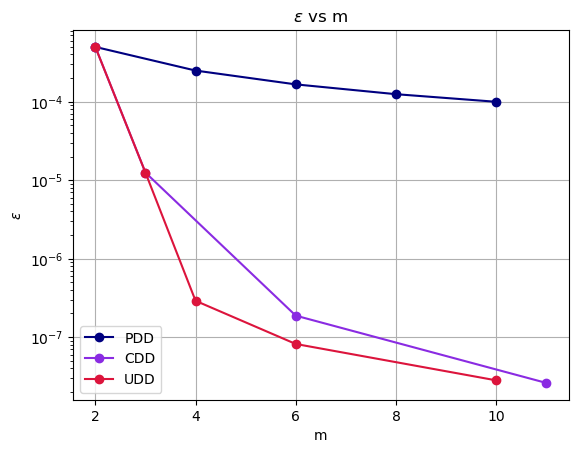

In [7]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")

plt.title('$\epsilon$ vs m')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()


## Minimize the $\epsilon$ function for a fixed T and m

### When m = 2

Fix T, $\lambda\$ and m = 2

In [8]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    print(epsilon)
    return epsilon    

In [9]:
# Starting guess
s_values_start = [0.5, 0.5]

# Constraints -> s1 + s2 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
print("s1 = " + str(s1) + " s2 = " + str(s2))

0.0004995820845830152
0.0004995820945077682
0.0004995820945077682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0004995820845830152
            Iterations: 1
            Function evaluations: 3
            Gradient evaluations: 1
s1 = 0.5 s2 = 0.5


### When m = 3
Fix T, $\lambda\$ and m = 3

In [10]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    B = np.dot(A, expm(-1j*(Z+lambda_value*X)*s3*T))
    difference = B - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [11]:
epsilon_func([1/4,1/2,1/4])

1.2499098133246424e-05

In [12]:
# Starting guess
s_values_start = [0.3, 0.3, 0.3]

# Constraints -> s1 + s2 + s3 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.165208430904028e-07
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
s1 =  0.2503130725742426  s2 =  0.49937393184583934  s3 =  0.2503129955799181


### When m = 4
Fix T, $\lambda\$ and m = 4

In [13]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    B = np.dot(expm(-1j*(Z+lambda_value*X)*s3*T), expm(-1j*(Z-lambda_value*X)*s4*T))
    C = np.dot(A,B)
    difference = C - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [14]:
epsilon_func([0.14644660940672624, 0.3535533905932736, 0.35355339059327384, 0.14644660940672627])

2.9031863262767787e-07

In [15]:
epsilon_func([1/4,1/4,1/4,1/4])

0.00024963537821602496

In [18]:
# Starting guess
s_values_start = [0.15, 0.35, 0.35, 0.15]

# Constraints -> s1 + s2 + s3 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0, 1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.1357686000351654e-07
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
s1 =  0.14654465934958835  s2 =  0.35345536715333054  s3 =  0.3534553919878354  s4 =  0.14654458150924562
